In [67]:
import numpy as np
import pandas as pd
import missingno as msno

# Practice Questions for Pandas

## Question 1:   COVID Cases on 1/1/2021
In this problem, you will work on the covid dataset on 01/01/2021. You can read the description of the data-set here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

- Use the `read_csv` method of `pandas` to read the data-set `https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv` to a DataFrame (name it `df`). Use `head` to print it.


In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv")
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


- What is the `shape` of this dataset?

In [69]:
df.shape

(4011, 14)

- Get to know your data-set using `info()` and `describe()` methods.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


In [71]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3922.000000,3922.000000,4.011000e+03,4011.000000,4.011000e+03,4.011000e+03,3922.000000,3963.000000
mean,32386.688208,35.768908,-71.113714,2.102613e+04,476.518823,1.180731e+04,9.259591e+03,5738.940929,2.228699
std,18017.294540,13.391261,55.220345,1.055172e+05,2833.090464,8.193885e+04,5.719777e+04,3227.374130,17.174874
min,66.000000,-71.949900,-175.198200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19049.000000,33.202974,-96.580090,7.010000e+02,9.000000,0.000000e+00,5.780000e+02,3536.967442,0.969239
50%,30067.000000,37.910342,-86.708116,1.968000e+03,31.000000,0.000000e+00,1.657000e+03,5840.344304,1.551567
75%,47039.000000,42.181730,-77.358102,7.693500e+03,112.000000,0.000000e+00,4.915500e+03,7752.568815,2.341350
max,99999.000000,71.706900,178.065000,2.636045e+06,81593.000000,2.114760e+06,2.400750e+06,27388.219766,1026.206897


You will see that the range of `Case_Fatality_Ratio` is from `0` to `1026.20`. Based on the data-set's description `Case-Fatality Ratio = Number of recorded deaths / Number of cases * 100`. Since the recorded deaths cannot be greater than the number of confirmed cases, any values greater than 100 are not acceptable for the `Case_Fatality_Ratio` column. 
- Only keep the rows which `df.Case_Fatality_Ratio <= 100`and remove the ones that are greater than 100. Don't forget to save the results back on `df`. 
- Use `shape` to see how many rows are removed when compared to the previouse time we run `shape`.

In [72]:
df = df[df.Case_Fatality_Ratio <= 100]
df.shape

(3960, 14)

- Create a subset of the data-set (name it `df_obj`) which only includes the text type(`object`) columns and use `describe()` method to answer the following questions:  


In [73]:
df_obj = df.select_dtypes(include="object")
df_obj.describe()

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
count,3236,3786,3960,3960,3960
unique,1916,593,196,5,3960
top,Washington,Texas,US,2021-01-02 05:22:33,Afghanistan
freq,30,254,3241,3953,1


It looks like there are a few unique values of `Last_Update`. Let's explore more. 
- Apply `value_counts()` method on the `Last_Update` column. 




In [74]:
df.Last_Update.value_counts()

Last_Update
2021-01-02 05:22:33    3953
2020-12-21 13:27:30       2
2020-08-04 02:27:56       2
2021-04-02 15:13:53       2
2020-12-29 23:22:37       1
Name: count, dtype: int64

- As you can see there are a few rows with unreasonable updating dates. Use `groupby()` and `get_group()` methods to get only the rows with `2021-01-02 05:22:33` value. Don't forget to save the filtered dataframe back on `df`. 
- Now, Apply `value_counts()` method on the `Last_Update` column to make sure that those 7 rows are deleted. 

In [75]:
df = df.groupby("Last_Update").get_group("2021-01-02 05:22:33")
df.Last_Update.value_counts()

Last_Update
2021-01-02 05:22:33    3953
Name: count, dtype: int64

- For some countries such as US and Japan, the dataset provided the detailed county/state stats and not the total stats. Find the total number of `Confirmed`, `Deaths`, `Recovered`, `Active` cases for each `Country_Region` using the `groupby()` method. Name the results  `df_all_countries` and print it. 


In [76]:
df_all_countries = df.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
df_all_countries

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,52513,2201,41727,8585
Albania,58316,1181,33634,23501
Algeria,99897,2762,67395,29740
Andorra,8117,84,7463,570
Angola,17568,405,11146,6017
...,...,...,...,...
West Bank and Gaza,139223,1418,118926,18879
Winter Olympics 2022,0,0,0,0
Yemen,2101,610,1396,95


- Add a column `Case_Fatality_Ratio` to `df_all_countries`. Based on the data-set desscription, `Case_Fatality_Ratio` is `the number of deaths / number of confirmed cases*100` and print `df_all_countries` using `head` method to see what the new column looks like. 

In [77]:
df_all_countries["Case_Fatality_Ratio"] = df_all_countries["Deaths"] / df_all_countries["Confirmed"] * 100
df_all_countries.head()


df_all_countries.sort_values(by="Case_Fatality_Ratio", ascending = False)

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
Country_Region,,,,,
Yemen,2101,610,1396,95,29.033793
MS Zaandam,9,2,7,0,22.222222
Peru,1015137,93231,0,921906,9.184081
Mexico,1437185,126507,0,1310678,8.802416
Ecuador,213378,14051,184507,14820,6.585028
...,...,...,...,...,...
Antarctica,0,0,0,0,NaN
"Korea, North",0,0,0,0,NaN
Nauru,0,0,0,0,NaN


- It was expected that if the number of confirmed cases for a country is zero, Case_Fatality_Ratio will be NaN, right? Try `.isna().sum()` method on the column `df_all_countries` to see how many `NaN`s there are. 


In [78]:
df_all_countries.Case_Fatality_Ratio.isna().sum()

np.int64(5)

- Apply the `fillna()` method to replace NaN values with `0`. Don't forget to use the argument `inplace=True` to change the original data-set of `df_all_countries`. Run a `.isna().sum()` code similar to the previous part again to make sure the number of `NaN`s is now zero.


In [79]:
df_all_countries.Case_Fatality_Ratio.fillna(0, inplace=True)
df_all_countries.Case_Fatality_Ratio.isna().sum()

/var/folders/4w/zz44xt0x4yx19mn8x1c1qzcr0000gn/T/ipykernel_50617/3400901781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_countries.Case_Fatality_Ratio.fillna(0, inplace=True)


np.int64(0)

- Apply `sort_values()` method on `df_all_countries` and slice the results to print a dataframe containing the stats of the top 5 countries based on 
    - the total number of `Deaths`.
    - the total number of `Confirmed`.
    - the `Case_Fatality_Ratio`.


In [80]:
df_all_countries.sort_values(by="Deaths", ascending=False)[:5]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
Country_Region,,,,,
US,20380197,350702,0,19974884,1.720798
Brazil,7703971,195541,6855372,649795,2.538185
India,10305788,149218,9883461,273109,1.447905
Mexico,1437185,126507,0,1310678,8.802416
United Kingdom,2549671,95816,5682,2469774,3.757975


In [81]:
df_all_countries.sort_values(by="Confirmed", ascending=False)[:5]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
Country_Region,,,,,
US,20380197,350702,0,19974884,1.720798
India,10305788,149218,9883461,273109,1.447905
Brazil,7703971,195541,6855372,649795,2.538185
Russia,3153960,56798,2553467,543695,1.800847
France,2697014,64891,200822,2431301,2.406031


In [82]:
df_all_countries.sort_values(by="Case_Fatality_Ratio", ascending=False)[:5]

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
Country_Region,,,,,
Yemen,2101,610,1396,95,29.033793
MS Zaandam,9,2,7,0,22.222222
Peru,1015137,93231,0,921906,9.184081
Mexico,1437185,126507,0,1310678,8.802416
Ecuador,213378,14051,184507,14820,6.585028


- One can replicate the previous task on the `Province_State` column to find the top 5 US states with the highest number of covid cases. But first, you need to split the `df` data-set into two smaller parts `df_US` and `df_Non_US`:
    - `df_US` a subset of `df` containing the rows which `Country_Region` is the `US`. Use `head` method to print `df_US`.
    - `df_Non_US` a subset of `df` containing the rows which `Country_Region` is not the `US`. Use `head` method to print `df_Non_US`.


In [83]:
df.shape

(3953, 14)

In [84]:
df_US = df[df.Country_Region == "US"]
df_US.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
648,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0,4189,"Autauga, Alabama, US",7587.391935,1.179523
649,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0,13654,"Baldwin, Alabama, US",6192.157109,1.222600
650,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0,1484,"Barbour, Alabama, US",6145.183505,2.175346
651,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0,1808,"Bibb, Alabama, US",8279.003304,2.481122
652,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0,4630,"Blount, Alabama, US",8115.726490,1.342425


In [85]:
df_Non_US = df[df.Country_Region != "US"]
df_Non_US.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


- Use the `bar()` method from the `missingno` module to visualize the frequency of `NaN`s in `df_Non_US`.


<Axes: >

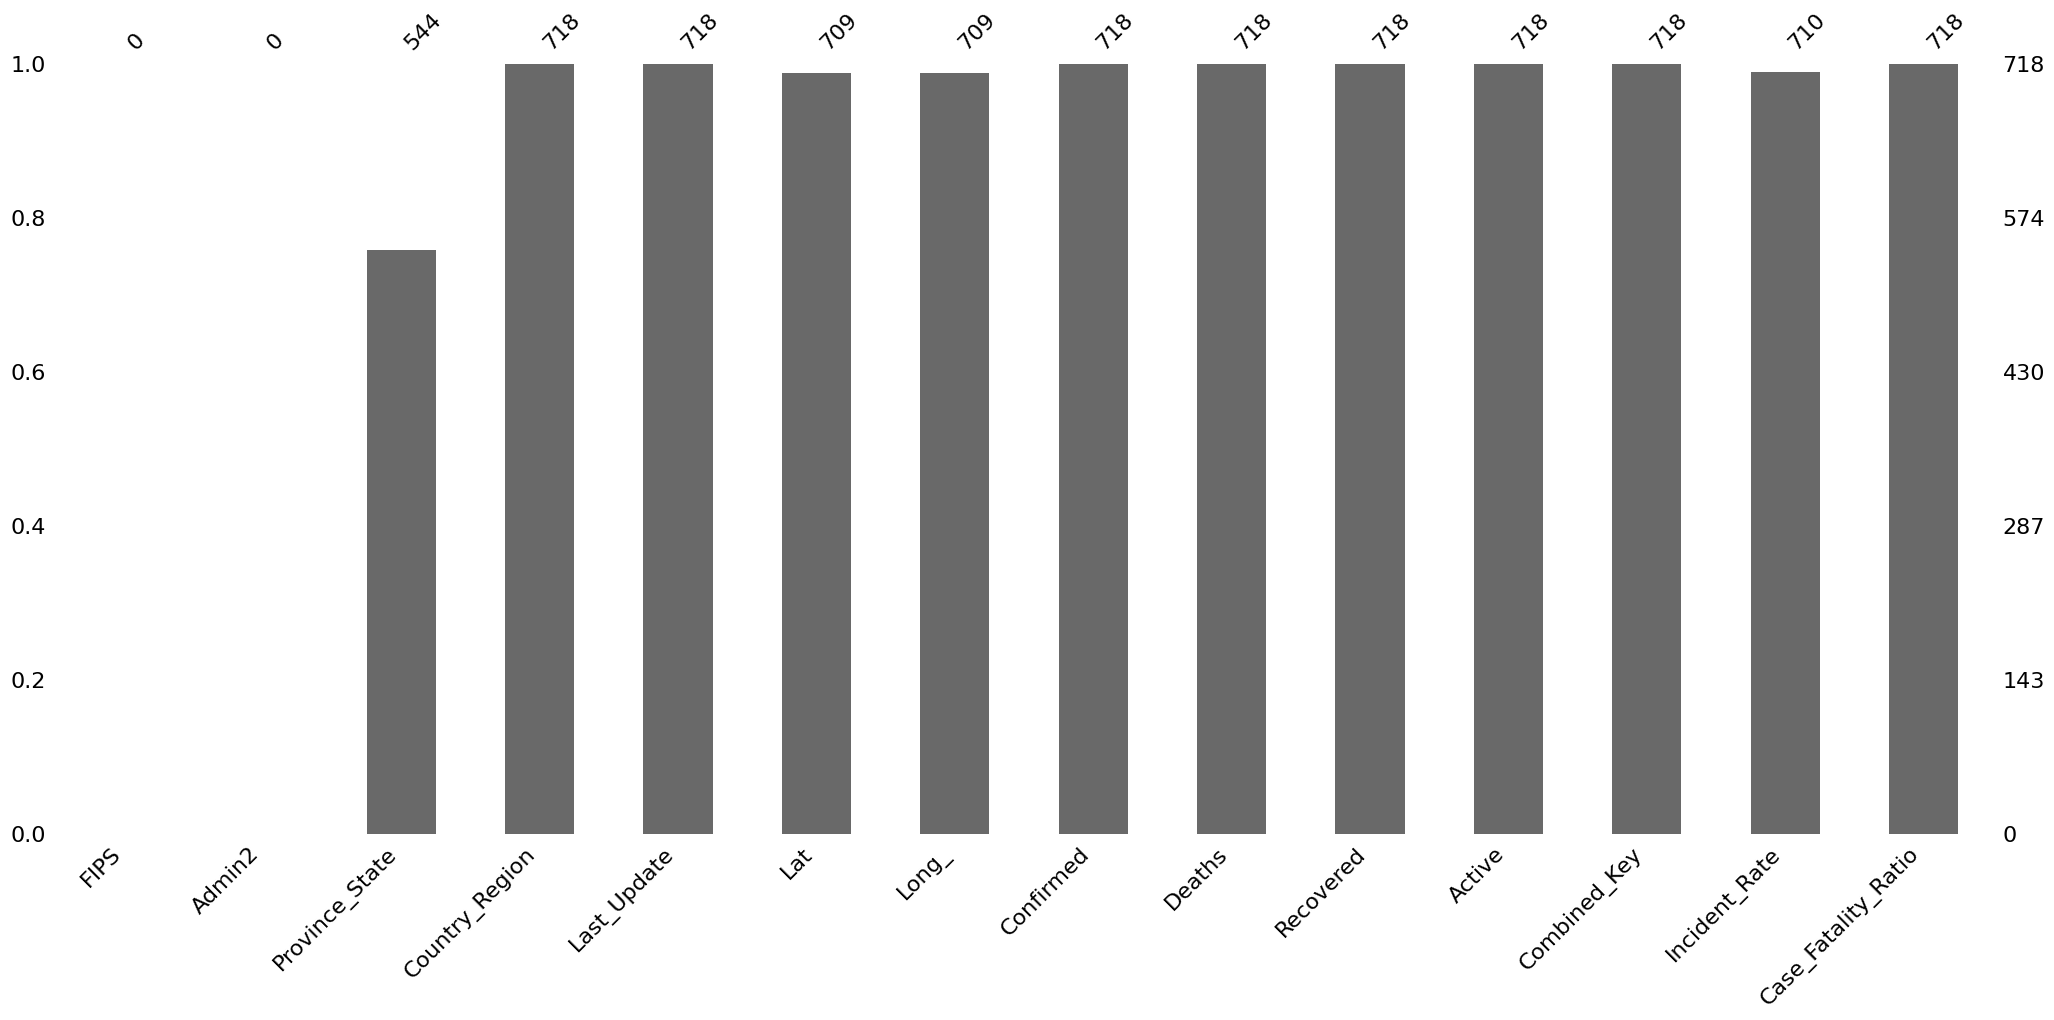

In [86]:
msno.bar(df_Non_US)

As you can see, the first two columns have no non-NaN values. This matches with the description of the data-set. These two columns are for US only. 
- Use the `drop()` method to remove these two columns. Don't forget to save the filtered dataframe back on `df_Non_US`.
- Try `bar()` method one more time to see if your changes were applied on `df_Non_US`.

<Axes: >

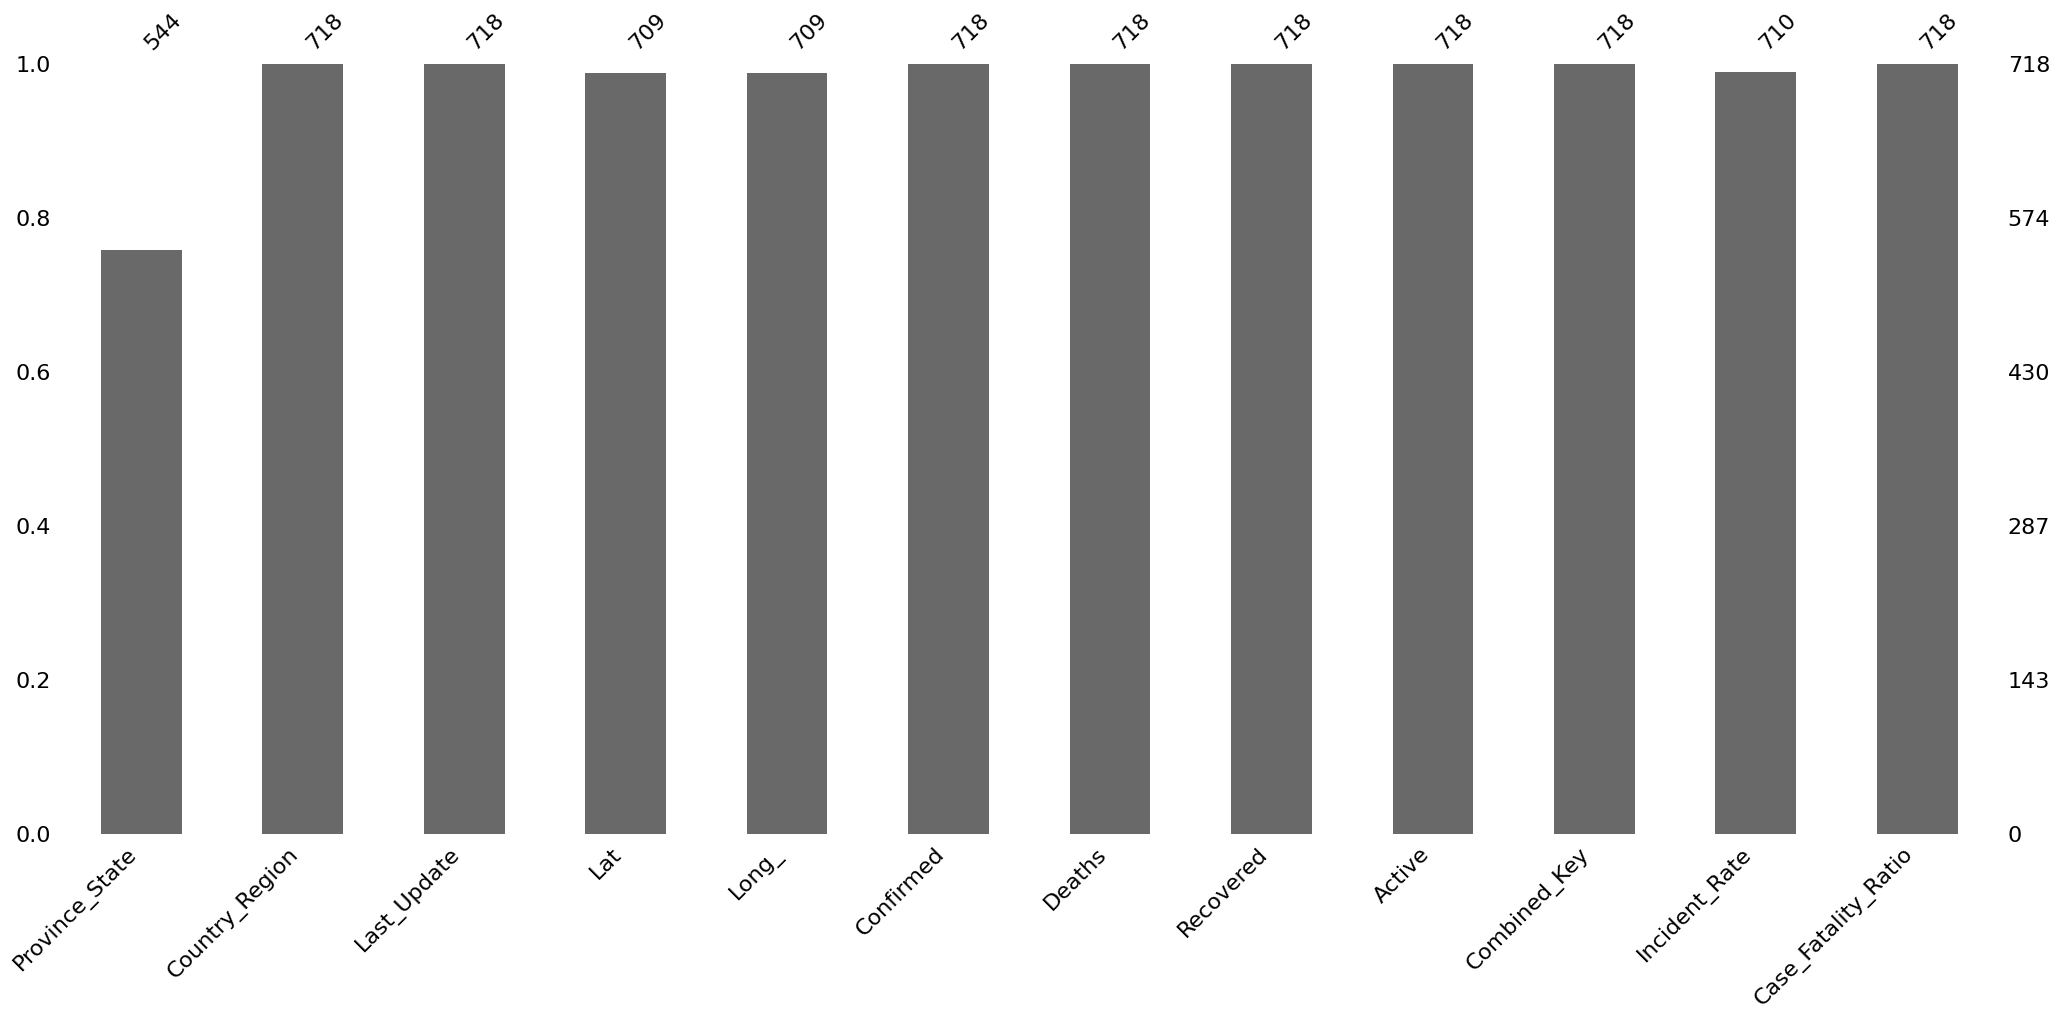

In [87]:
df_Non_US = df_Non_US.drop(columns=["FIPS", "Admin2"])
msno.bar(df_Non_US)

 As you can see, there are still some NaNs in other columns but that is enough for now. Let's move to `df_US`.
 - Use the `bar()` method from the `missingno` module to visualize the frequency of `NaN`s in `df_US`.


<Axes: >

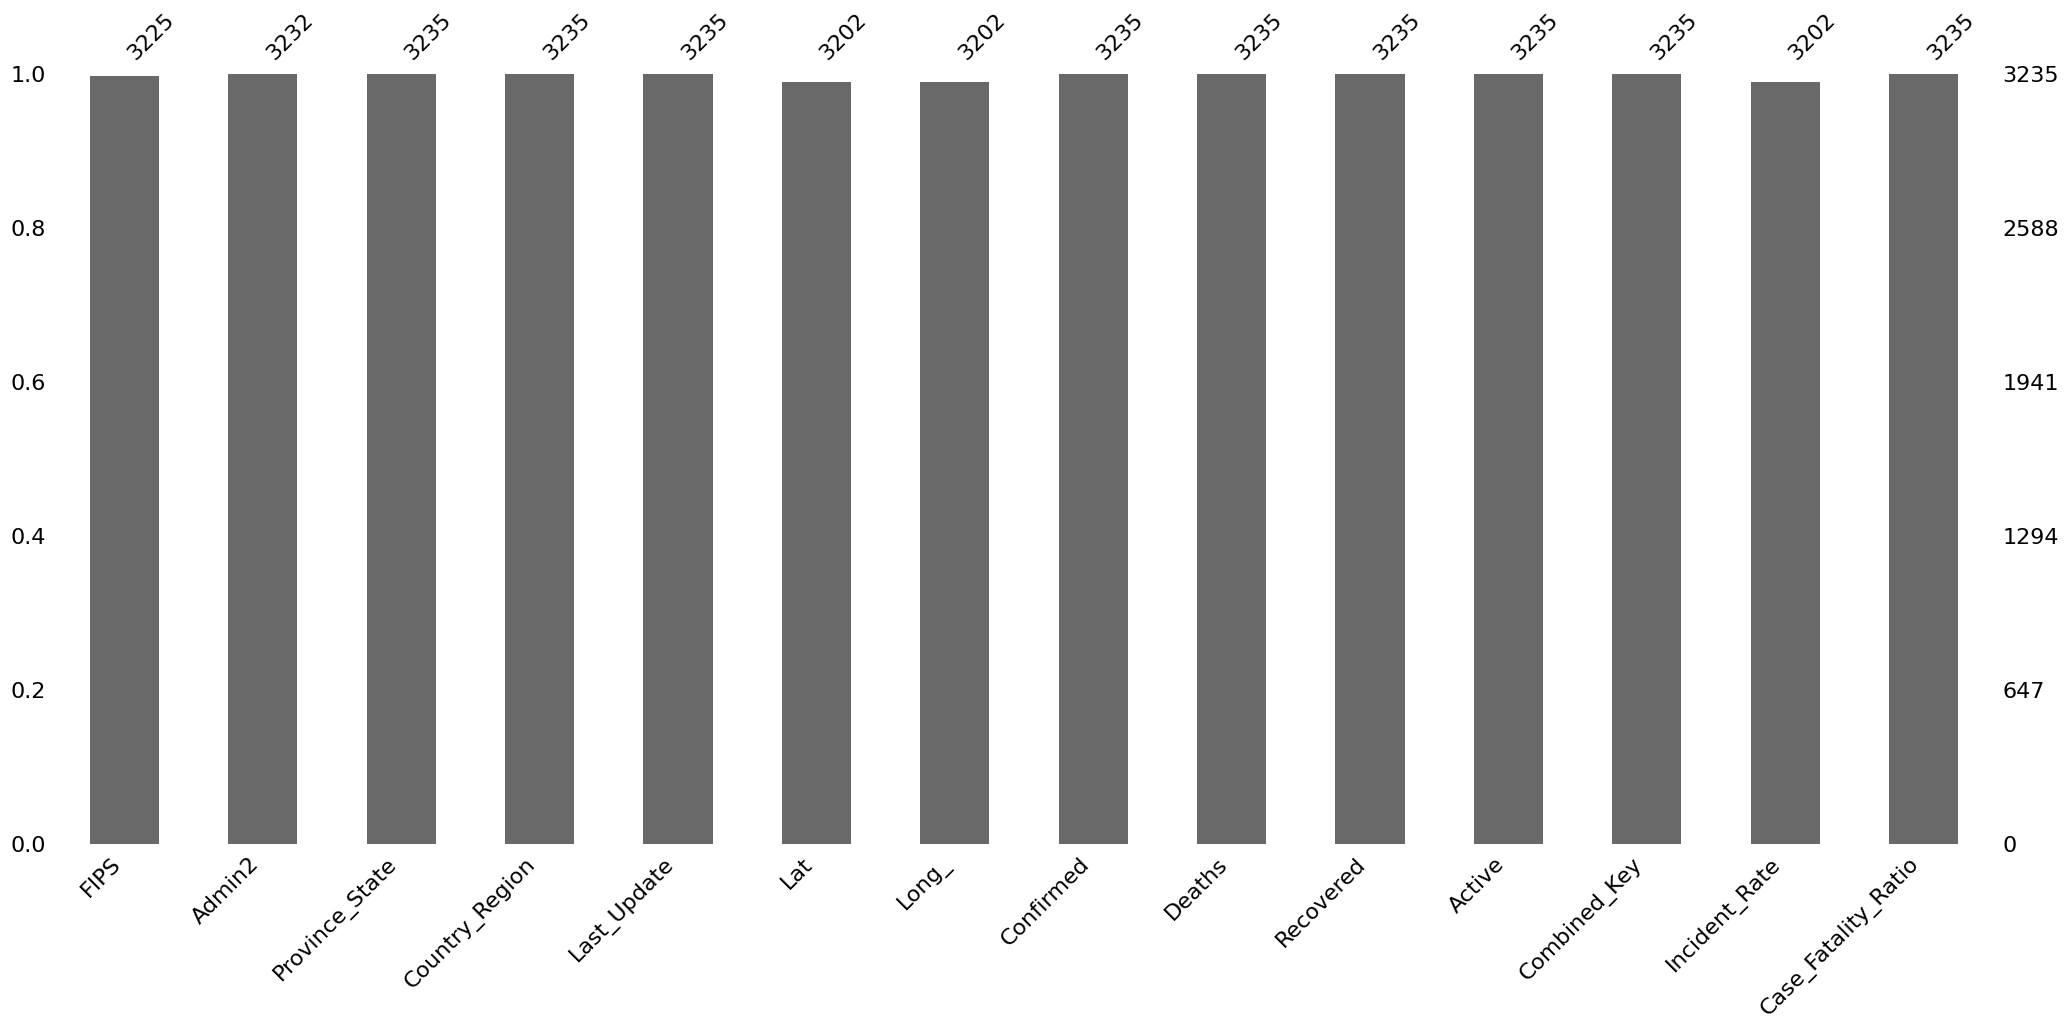

In [88]:
msno.bar(df_US)

- What is the `shape` of `df_US`?


In [89]:
df_US.shape

(3235, 14)

- As you can see, there are very few NaN values. It seems okay to use the `dropna()` method to remove all rows with at least one NaN and save the results back on `df_US`. 
- Print the `shape` of `df_Us` one more time to see how many rows are deleted. 

In [90]:
df_US = df_US.dropna()
df_US.shape

(3191, 14)

## Question 2: JHU SIS

In this problem, you are going to work on the `SIS` data-set for the years of 2021 and 2022.

The methods that you need to know before doing this assignment are as follows:

**pd Methods:**
 - `.read_csv()`
 
**dataframe methods:** 
 - `.head()`
 - `.info()`
 - `.describe()`
 - `.drop()`
 - `.value_counts()`
 - `.isin()`
 - `.replace()`
 - `.crosstab()`
 - `.groupby()`
 
**str methods:** 
 - `.split()`
 
**attributes:**
 - `.shape()`
 - `.iat()`
 
**Others:**
 - `for` loop
 - `range()`
 
 Before starting to work on this assignment, read the handouts Pandas Parts A and B. Also practice `Week 4_class file.ipynb` and the **latest** version of `Updated_Week-5_Classwork.ipynb` and let me know if you have any questions. I have office hours on Fridays 12-1pm and 5-6 pm. Feel free to join the office hours with all your questions
 

### Reading Data:
- Import numpy and pandas

In [91]:
import numpy as np
import pandas as pd

- Please download the data-set `SIS.csv`from Canvas and read the csv file to a DataFrame.
- Use the `head` methods to see the first few rows of data.

In [92]:
sis = pd.read_csv("SIS.csv")
sis.head()

,code,course,semester,campus,days,type,instructor
0,BU.210.620 (81),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,W 6:00PM - 9:00PM,Open,C. Freitag
1,BU.210.620 (1F),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 1:30PM - 4:30PM,Open,D. Tong
2,BU.210.620 (F1),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 8:30AM - 11:30AM,Open,D. Tong
3,BU.210.620 (X1),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 8:30AM - 11:30AM,Open,G. Bai
4,BU.210.620 (1W),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 1:30PM - 4:30PM,Open,J. Rippy


- Use the `info` and `describe` methods to explore the data.

In [93]:
sis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        1542 non-null   object
 1   course      1542 non-null   object
 2   semester    1542 non-null   object
 3   campus      1542 non-null   object
 4   days        1037 non-null   object
 5   type        1542 non-null   object
 6   instructor  1502 non-null   object
dtypes: object(7)
memory usage: 84.5+ KB


In [94]:
sis.describe()

,code,course,semester,campus,days,type,instructor
count,1542,1542,1542,1542,1037,1542,1502
unique,1049,168,5,7,49,4,200
top,BU.610.705 (31),Business Communication,Fall 2021,Online,T 8:30AM - 11:30AM,Open,R. Milter
freq,6,81,489,564,99,1199,35


- What is the shape of the dataset?

In [95]:
sis.shape

(1542, 7)

### Data Cleaning:
- Drop the column `type`. Make sure to use `inplace=True` argument to save it on itself.
- Use the `head` methods to see how the dataset changed.

In [96]:
sis.drop('type', axis = 1, inplace = True)
sis.head()

,code,course,semester,campus,days,instructor
0,BU.210.620 (81),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,W 6:00PM - 9:00PM,C. Freitag
1,BU.210.620 (1F),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 1:30PM - 4:30PM,D. Tong
2,BU.210.620 (F1),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 8:30AM - 11:30AM,D. Tong
3,BU.210.620 (X1),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 8:30AM - 11:30AM,G. Bai
4,BU.210.620 (1W),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 1:30PM - 4:30PM,J. Rippy


- Apply `value_counts()` method on the `campus` column. As you can see, Carey mostly teaches in one of the three campuses of `Downtown Baltimore`, `Washington DC Center`, `Online`. There are a few rows with different values of `campus`. 

In [97]:
sis.campus.value_counts()

campus
Online                                       564
Downtown Baltimore                           505
Washington DC Center                         446
Off site (Not JHU)                            20
Homewood Campus                                5
Downtown Baltimore and Online                  1
Downtown Baltimore and Off site (Not JHU)      1
Name: count, dtype: int64

- Use the `isin` method to get only the rows with `Downtown Baltimore`, `Washington DC Center`, `Online` values. Don't forget to save the filtered dataframe back on itself.
- Print the results of `value_counts()` to make sure that you successfully deleted those 27 rows.

In [98]:
sis = sis[sis.campus.isin(['Online','Downtown Baltimore','Washington DC Center'])]
sis.campus.value_counts()

campus
Online                  564
Downtown Baltimore      505
Washington DC Center    446
Name: count, dtype: int64

### Data Transforming:

Column `code` has the code of each course. As you know each Carey's course has the following format: `__.p__.___ (s_)`. In other words, `program_code(p)` will be the **4th** character of the `code`, and `section_code(s)` will be the **13th** character of the `code`.  For example, if the code is `BU.210.650 (34)`, program_code will be `2` and section_code will be `3`.

- Add two columns to the dataframe and name them `program_code` and `section_code`.  
- Hints: 
    - You can first add those two columns with the initial values `"-"`. Then using a `for` loop, iterate through rows and revise the values of these two columns for each row.

Column `semester` contains both term and the year. 
- Separate these two values into two different columns. `term` and `year`. Then drop the column `semester` from the dataframe. 
- Hint: 
    - You can use the strings' `split` method to split the term and year with the space delimiter.
    - You can still use a `for` loop or `map` function to apply the task on each row.
    
Do the last two steps in one for loop.

Below is how you can get program_code. You should use the code below and do the same for the next 3 course_code, term, and year as well.

```python 
sis['program_code'] = '-'

for i in range(sis.shape[0]):
    course_code = sis.iat[i,0]
    # 6 refers to column 6(program_code)
    sis.iat[i, 6] = course_code[3]
```

- Use the `head` methods to see how the dataset changed.

In [99]:
sis['program_code'] = '-'
sis['section_code'] = '-'
sis['term'] = '-'
sis['year'] = '-'

for i in range(sis.shape[0]):
    course_code = sis.iat[i,0]
    sis.iat[i, 6] = course_code[3]
    sis.iat[i, 7] = course_code[12]
    
    semester = sis.iat[i,2]
    term, year = semester.split(' ')
    sis.iat[i, 8] = term
    sis.iat[i, 9] = year

sis.head()

,code,course,semester,campus,days,instructor,program_code,section_code,term,year
0,BU.210.620 (81),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,W 6:00PM - 9:00PM,C. Freitag,2,8,Fall,2021
1,BU.210.620 (1F),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 1:30PM - 4:30PM,D. Tong,2,1,Fall,2021
2,BU.210.620 (F1),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 8:30AM - 11:30AM,D. Tong,2,F,Fall,2021
3,BU.210.620 (X1),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 8:30AM - 11:30AM,G. Bai,2,X,Fall,2021
4,BU.210.620 (1W),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 1:30PM - 4:30PM,J. Rippy,2,1,Fall,2021


- Add a new column and name it `status`. This column should indicate whether a course is `online` or `onsite`. If the `campus` column has the value "Online" it means it is an `Online` course otherwise it is an `Onsite`. Hint: first set all the values of `status` column to `Onsite` and then change the `status` value of the rows that `sis.campus` is Online to `online`. You should NOT use a for loop for this question.
- What percentage of courses were offered in the onsite format? (use `value_counts` method and `normalize=True` argument.)

In [100]:
sis['status'] = 'onsite'
# sis['status'][sis.campus == "Online"]= "online"
sis.loc[sis.campus == "Online", 'status'] = "online"

sis['status'].value_counts(normalize=True)

status
onsite    0.627723
online    0.372277
Name: proportion, dtype: float64

- Now that you have the `program_code` and `section_code` columns, use the `pandas` `replace` method to convert the codes to  real names. I have created the required dictionary for you below. 
- Use the `head` methods to see how the dataset changed.

In [101]:
encoding_dict = {
    "program_code": {
        "0": "Others",
        "1": "Management",
        "2": "Finance/Real_Estate",
        "3": "Information_Systems",
        "4": "Marketing",
        "5": "Quantitative_Methods",
        "6": "Operations_Management",
        "7": "-",
        "8": "Business_of_Health",
        "9": "MBA",
    },
    "section_code": {
        "C": "Internship",
        "F": "FT_FI_HE",
        "H": "FT_HCM",
        "I": "Independent",
        "K": "FT_MK",
        "M": "FT_MBA",
        "R": "FT_RE",
        "S": "Shadow",
        "T": "FT_IS",
        "U": "Minor",
        "W": "FT_DC",
        "X": "FT_BARM",
        "3": "Online",
        "5": "DC",
        "8": "HE",
        "9": "International",
        "0": "-",
        "1": "-",
        "2": "-",
        "4": "-",
        "6": "-",
        "G": "-",
    },
}

In [102]:
sis.replace(encoding_dict, inplace=True)
sis.head()

,code,course,semester,campus,days,instructor,program_code,section_code,term,year,status
0,BU.210.620 (81),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,W 6:00PM - 9:00PM,C. Freitag,Finance/Real_Estate,HE,Fall,2021,onsite
1,BU.210.620 (1F),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 1:30PM - 4:30PM,D. Tong,Finance/Real_Estate,-,Fall,2021,onsite
2,BU.210.620 (F1),Accounting and Financial Reporting,Fall 2021,Downtown Baltimore,M 8:30AM - 11:30AM,D. Tong,Finance/Real_Estate,FT_FI_HE,Fall,2021,onsite
3,BU.210.620 (X1),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 8:30AM - 11:30AM,G. Bai,Finance/Real_Estate,FT_BARM,Fall,2021,onsite
4,BU.210.620 (1W),Accounting and Financial Reporting,Fall 2021,Washington DC Center,F 1:30PM - 4:30PM,J. Rippy,Finance/Real_Estate,-,Fall,2021,onsite


**Exploratory Data Analysis**

- Use the `crosstab()` method to find the joint frequency of `program_code` and `section_code`. Make sure to include the margins (subtotals) in the crosstab as well.


In [103]:
joint_frequency = pd.crosstab(index = sis.program_code, columns = sis.section_code, margins=True)

print(joint_frequency)

section_code            -   DC  FT_BARM  FT_DC  FT_FI_HE  FT_HCM  FT_IS  \
program_code                                                              
Business_of_Health      0    0        0      0         0      17      0   
Finance/Real_Estate    29   86       14     61        74       0      0   
Information_Systems     2   19       10      0         0       0     27   
MBA                     2    0        0      0         0       0      0   
Management             20   19       15     19        22       2      5   
Marketing               2    9        9      0         0       0      0   
Operations_Management   0    8       24      0         0       0      1   
Others                  0    0        0      0         0       0      0   
Quantitative_Methods   13   17       30      5         9       1      6   
All                    68  158      102     85       105      20     39   

section_code           FT_MBA  FT_MK  FT_RE   HE  International  Online   All  
program_code       

- Using `groupby` method, find the frequency of courses in each year and each term.

In [104]:
sis.groupby(["year", "term"]).course.count()

year  term  
2021  Fall      487
      Spring    365
      Summer    123
2022  Spring    429
      Summer    111
Name: course, dtype: int64

- Find out the 5 instructors with the highest number of sections in the year 2022. You can ignore the fact that some courses have more than one instructor.

In [105]:
sis_2022 = sis[sis.year == '2022']

instructor_sections = sis_2022.instructor.value_counts()

instructor_sections[0:5]

instructor
R. Milter          15
J. Rippy           13
B. Robeson         11
J. Ganzermiller    11
C. Jung            11
Name: count, dtype: int64